In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, date
import seaborn as sns
#import seaborn.objects as so
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels as st
from scipy.stats import norm, f
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import LogisticRegression
import math
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## **Section 1 - Research question**
During the semester we choose to explore the Athletes dataset, describing athletes participated in the Olympic Games of 2016.
In this part of the project, we will explore the relations between the following explaining variables : 
    Athleth Gender (discrete), 
    Athlet Weight (continous), 
    Athlete Medal Winning (Discrete)
To the Explained variable : 
    Athletes participating Age of the 
The research question is: Is there any relation between the athleth weight,considering the gender and winning in the games, to the age of the athleth prefforming?
The propuse of this question is trying to see if there is any relation, since it is a very common though that age becomes a serious deal to athlets, together with weight gaining and stress of winning at any contest at all.


In [2]:
def get_cleaned_data():
    data = pd.read_csv('athletes.csv')
    data['dob'] = pd.to_datetime(data["dob"], format='%m/%d/%y')
    data['age'] = (pd.to_datetime('now') - data['dob']).astype('<m8[Y]')
    data['age'] = data['age'].astype(float)
    data = data.loc[data['age'] > 0, :]
    data = data.dropna()
    data["total"] = data[['gold', 'silver', 'bronze']].agg(sum, axis=1)
    data['gender']=data['sex'].copy()
    data['gender']= data['gender'].apply(lambda x: 1 if x=='Female' else 0)
    data['won'] = data['total'].apply(lambda x: True if x > 0 else False)
    return data

In [3]:
def get_sample(data):
    winners = data.loc[data['won'], :]
    winners_sample = winners.sample(n=200, random_state=1)
    winners_sample.to_csv('winners_sample.csv')
    winners = winners[['height', 'weight', 'age', 'sport', 'sex', 'won', 'total','gender']]
    sample = data.sample(n=200, random_state=1)
    return sample


In [4]:
def section1():
    whole_df = get_cleaned_data()
    sample = get_sample(whole_df)
    return whole_df, sample

In [5]:
whole_df, sample = section1()
explaining_vars_row = ['weight', 'gender', 'won']
explained_var = ['age']

## **Section 2**

In [6]:
def section2(whole_df, explaining_vars: list, explained_var: list):
    train_data, test_data, train_res, test_res = train_test_split(whole_df[explaining_vars], whole_df[explained_var],
                                                                  test_size=(len(whole_df) - 200) / len(whole_df),
                                                                  random_state=42)
    return train_data.astype(float), test_data.astype(float), train_res.astype(float), test_res.astype(float)

In [7]:
train_data, test_data, train_res, test_res = section2(whole_df,explaining_vars_row, explained_var)

## **Section 3**
In the 3rd section we have decided not to generate many graphs and overloads you, but to try handling the plotting in a concise and understoodable way. 
We used the seaborn package with JointGreed, for handaling both descrete and contionouts:
In the first figure, we describe in the central plot a scatter, repressting the realtion of 'weight' and 'age' with respect to the athleth gender. 
In the second figure, we describe in the central plot a scatter repressting the same realtion of 'weight' and 'age' , but with respect to the athleth winning indicators.
Since the Weight is the only continous attribute, we though that it might be the feature with the most influence on the regression model.
Hence, we were intrested to watch the influence of sex and winning medals on the groups. 
As you will see next, 'sex' keeping higher variance in the data then 'won', which is understoodable. 
On the upper bound and the right bound of the figures you can find the histogram of each group, each color represent the observed descrete feature 
[legend added for your conveniecne].

Missing values: 
Raw data contained NaN values, so we removed the columns from the data.
The decision was based on the fact that we had enogh data, so handling the missing values in another ways (like pd.fillna()) seemd to be irrelevant.

Abnormal data: Since we want to check the age based on 'date of birth' column, we used several manipulation and keep the 'age' feature in a new column.
for the descrete features we used pd.apply for replacing boolean values with 1-0 integer values.

Few 'age' values were absolutly abnormal, like year=2069 in date of birth. We did not observe any new misleading data that we did not handle in the projects before.

Distribution of the variables: 
As we can see from the plots, it seems that age and weight are from Normal distribution.
The sex distribution is not very obvious, especialy considering the fact that most of the olympic athletes are in the age interval of 20-50.
The winning distribution is not obvious, and seems like Uniform. We cannot infer distributions basing on graph (and of course a small dataset), but it is likly that weight indeed Normaly distibuted.

In [8]:
def section3(sample):
    print()
    print("====================================================================================================")
    print("Q1/3")
    print("====================================================================================================")
    create_good_hist(sample)
    create_table(sample)

In [9]:
def create_hist(sample, c_variable='age'):
    df_subset = sample[['sex', 'age', 'height', 'weight', 'won']]
    fig, (ax1, ax2) = plt.subplots((2,1), figsize=(10, 5))
    df_subset.loc[df_subset['won'], c_variable].plot.hist(ax=ax1, density=True, color='#A63636', alpha=0.5,
                                                          edgecolor='#AA14F0', linewidth=1, bins=20, stacked=True,
                                                          sharex=True, label='Winners')
    df_subset.loc[~df_subset['won'], c_variable].plot.hist(ax=ax2, density=True, color='#226597', alpha=0.5,
                                                           edgecolor='#AA14F0', linewidth=1, bins=20, stacked=True,
                                                           sharex=True, label='Not Winners')

    ax1.legend()
    ax2.legend()
    plt.xlabel(c_variable)
    plt.show()

In [10]:
def create_good_hist(sample):
    p1 = ['#1EAE98','#C147E9']
    p2=['#F67280','#FFC300']
    p3=['#FD3A69','#04009A']
    p4=['#AF3264','#FABB51']
    p5=['#0E49B5','#EF2F88']
    labels=['age', 'weight']


    x,y = sample['age'],sample['weight'] 
    g = sns.JointGrid(data=sample,x=x,y=y,hue='sex')
    g.set_axis_labels(xlabel='Age', ylabel='Weight')
    g.plot_joint(sns.scatterplot,s=100, alpha=0.4,palette=p5)
    g.plot_marginals(sns.histplot,stat="density",bins=12,element="step",palette=p5,alpha=0.09,linewidth=2,legend=False,multiple="dodge")
    plt.show()

    x,y = sample['age'],sample['weight'] 
    g = sns.JointGrid(data=sample,x=x,y=y,hue='won')
    g.set_axis_labels(xlabel='Age', ylabel='Weight')
    g.plot_joint(sns.scatterplot,s=100, alpha=0.4,palette=p1)
    g.plot_marginals(sns.histplot,stat="density",bins=12,element="step",palette=p1,alpha=0.09,linewidth=2,legend=False,multiple="dodge")
    plt.show()

In [11]:
def create_table(sample):
    man = sample.loc[sample['sex']=='male',:]
    woman = sample.loc[sample['sex']=='female',:]
    male_won = man.loc[man['won'],:].shape[0]
    female_won = woman.loc[woman['won'],:].shape[0]
    male_loss = man.loc[~man['won'],:].shape[0]
    female_loss = woman.loc[~woman['won'],:].shape[0]
    answers = pd.DataFrame({'':['Male','Female'],'Winners':[male_won,female_won],'Not Winners':[male_loss,female_loss]})
    answers = answers.set_index('')
    display(answers)
    m = pd.DataFrame(man.groupby('age').count().loc[:,'sex'].transpose())
    w = pd.DataFrame(woman.groupby('age').count().loc[:,'sex'].transpose())
    m.rename(columns = {'sex':'Male'},inplace=True)
    w.rename(columns = {'sex':'Feale'},inplace=True)
    ages = m.join(w).fillna(0)
    ages.transpose()
    display(ages)


Q1/3


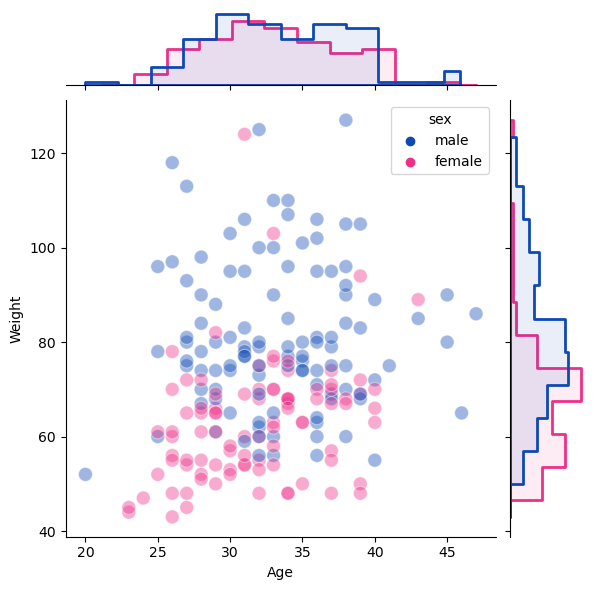

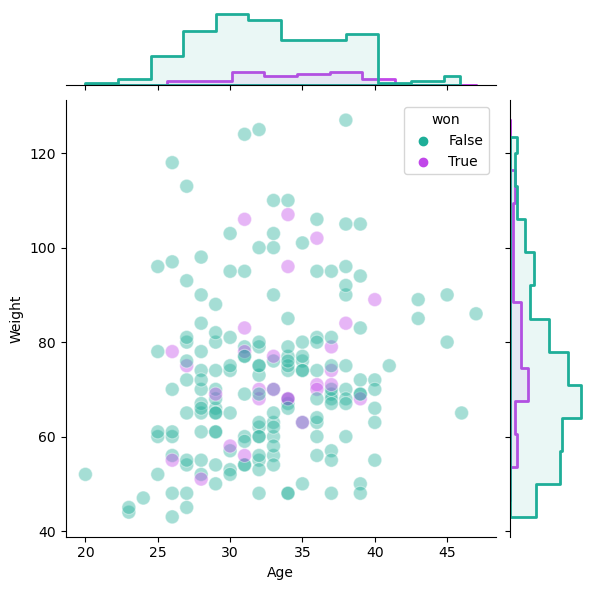

,Winners,Not Winners
,,
Male,12,96
Female,16,76


,Male,Feale
age,,
20.0,1,0.0
25.0,3,2.0
26.0,2,8.0
27.0,6,6.0
28.0,7,7.0
29.0,6,8.0
30.0,6,4.0
31.0,8,6.0
32.0,11,7.0


In [12]:
section3(sample)

## **Section 4**

As we learned in class, in Linear Regression, the relationship between the independent variable (x) and the dependent variable (y) is modeled using a linear equation of the form y = xTb.
for example, b0 + b1*x, where b0 is the intercept and b1 is the coefficient for x.

If you add 1 to the value of x, the value of y will change by an amount equal to the coefficient for x (b1).
So, the coefficient b1 influences the change in y that results from adding 1 to x in the sense that it determines the strength and direction of the relationship between x and y. 
If b1 is large, the change in y will be large.
If b1 is small, the change in y will be small. If b1 is positive, the change in y will be positive.
If b1 is negative, the change in y will be negative.

As we can see from the results, the betha's are very low, which indicated not a very strong realtions between the explaining fetures to the explained one. 

In [13]:
def s4_aux1(train_data,train_res):
    print()
    print("====================================================================================================")
    print("Q1/4")
    print("====================================================================================================")
    x = sm.add_constant(train_data)
    model = sm.OLS(train_res, x)
    print(model)
    results = model.fit()
    print(f'Model Beta Results :')
    display(results.params)
    return results,model

In [14]:
def s4_aux2(train_data,train_res,results):
    means = []
    variances = []
    columns = train_data.columns.to_list()
    for column in train_data.columns:
        table = train_data[:3].copy(deep=False)
        table[column] += 1
        upgraded_X = sm.add_constant(table,has_constant='add')
        X = sm.add_constant(train_data[:3],has_constant='add')
        res = results.predict(upgraded_X) - results.predict(X)
        means.append(np.mean(res))
        variances.append(np.var(res))
    
    results_df = pd.DataFrame({'Column': columns, 'Mean': means, 'Variance': variances})
    results_df = results_df.set_index('Column')
    display(results_df)
    return results



In [15]:
def section4(train_data, train_res):
    results,model = s4_aux1(train_data,train_res)
    results= s4_aux2(train_data,train_res,results)
    return model, results


In [16]:
model, sample_results= section4(train_data,train_res)


Q1/4
Model Beta Results :


const     27.983130
weight     0.060873
gender     0.000000
won        0.777799
dtype: float64

,Mean,Variance
Column,,
weight,0.0,0.0
gender,0.0,0.0
won,0.0,0.0


## **Section 5**


In [17]:
def section5(model):
    anova = {'Source of Variation': ['Regression', 'Residual error', 'Total'],
             'SS': [model.mse_model * 3, model.mse_resid * (model.nobs - 4), model.mse_total * (model.nobs - 1)],
             'DF': [3, model.nobs - 4, model.nobs - 1],
             'MS': [model.mse_model, model.mse_resid, model.mse_total],
             'F': [model.mse_model / model.mse_resid, '-', '-'],
             'F-Pvalue': [model.f_pvalue, '-', '-']
             }
    anova = pd.DataFrame(anova)
    anova.index = ["Regression", "Residuals \ Errors", "Total"]
    pd.set_option('display.max_colwidth', None)
    print()
    print("====================================================================================================")
    print("Q1/5")
    print("====================================================================================================")
    display(anova)

In [18]:
section5(sample_results)


Q1/5


,Source of Variation,SS,DF,MS,F,F-Pvalue
Regression,Regression,312.765522,3.0,104.255174,4.040445,0.019067
Residuals \ Errors,Residual error,5057.366760,196.0,25.802892,-,-
Total,Total,5291.680000,199.0,26.591357,-,-


## **Section 6**

As we can see ahead, all of the 200 estimated betas are within the confidence interval.

In [19]:
def section6(whole_df,my_df, explaining_vars, explained_var, results):
    print()
    print("====================================================================================================")
    print("Q1/6")
    print("====================================================================================================")
    display(results.conf_int(alpha=0.05))
    new_df = my_df[explaining_vars]
    new_df = pd.get_dummies(new_df, columns=['won'], drop_first=True)
    X = sm.add_constant(new_df)
    whole_model = sm.OLS(my_df[explained_var], X)
    whole_results = whole_model.fit()
    display(whole_results.params)
    whole_results_params = whole_results.params
    return whole_results, whole_results_params


In [20]:
whole_results, whole_results_params = section6(whole_df,sample, explaining_vars_row, explained_var, sample_results)


Q1/6


,0,1
const,24.626019,31.340240
weight,0.015771,0.105974
gender,0.000000,0.000000
won,-1.272364,2.827963


const       28.556168
weight       0.055560
gender       0.000000
won_True     0.376001
dtype: float64

## **Section 7**
In this section we used the F test as as statistic function, in order to see if and how well the model fits the data.
The Hypothesises:
/br/
$Null Hypothesis : \forall i\in(0,1,2,3):\; \beta_i=0$, 
$Alternative Hypothesis: \exists i\in(0,1,2,3)\;s.t:\; \beta_i\neq0 \;$
$Statistic Test: \frac{MSR}{MSE}$
/<br/
ANOVA table present p-value 0 for F test.
This results resulting in rejecting the null hypothesis at __all confidence levels__, which means there  is some coefficients which is different from zero.


In [21]:
def section7(results):
    print()
    print("====================================================================================================")
    print("Q1/7")
    print("====================================================================================================")
    if results.fvalue > f.ppf(0.95, 4, 196):
        print('Rejecting Null Hypothesis')
    else:
        print('Accepting Null Hypothesis')

In [22]:
section7(whole_results)


Q1/7
Rejecting Null Hypothesis


## **Section 8**

Linearity Assumption: 

Residuals Analysis plot points that there is no pattern / symmetry of the residuals around e=0 line. 
This might indicate that the linear model has catched most of the information but the noise itself.

Homoscedaticity:
From the residual analysis plot we can deduce that the spread of the error is different for different ranges of the predicted value.
Therefore, the error is heteroscedatic.

Residual's Distribution - QQ-Plot:
The Quantile-Quantile plot support the assumption for normal distribution over the residuals is quiet reasonable.
As we mentioned in Hw3 and Tutorial 5- 
הרעש מתפלג בצורה סימטרית סביב ה-0, עם עובי אלומת נקודות שנדמה קבוע וסביר, ולכן סביר להניח שהרעש אכן מתפלג נורמלית והקשר בין הנתונים לינארי.

In [23]:
def section8(results, train_data, train_res):
    print()
    print("====================================================================================================")
    print("Q1/8")
    print("====================================================================================================")
    p3 = ['#FD3A69', '#04009A']
    y_predicted = results.predict(sm.add_constant(train_data))
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    axes[0].scatter(y_predicted, results.resid,color='skyblue', edgecolor='#069AF3', alpha=0.9)
    axes[0].axhline(0,0, color=p3[0],lw=2,ls='--')
    axes[0].set_title('Residuals Analysis')
    axes[0].set_xlabel('Predicted y')
    axes[0].set_ylabel('Residuals')

    results.resid.hist(density=True, color='#A63636', alpha=0.5,edgecolor='#AA14F0', linewidth=2, bins=20, stacked=True,ax=axes[1])
    axes[1].set_title('Residuals Histogram')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Count')

    sm.qqplot(results.resid, norm, fit=True, color='#A63636', alpha=0.5, line="45", ax=axes[2])
    axes[2].set_title('Residuals QQ-Plot')

    plt.show()


Q1/8


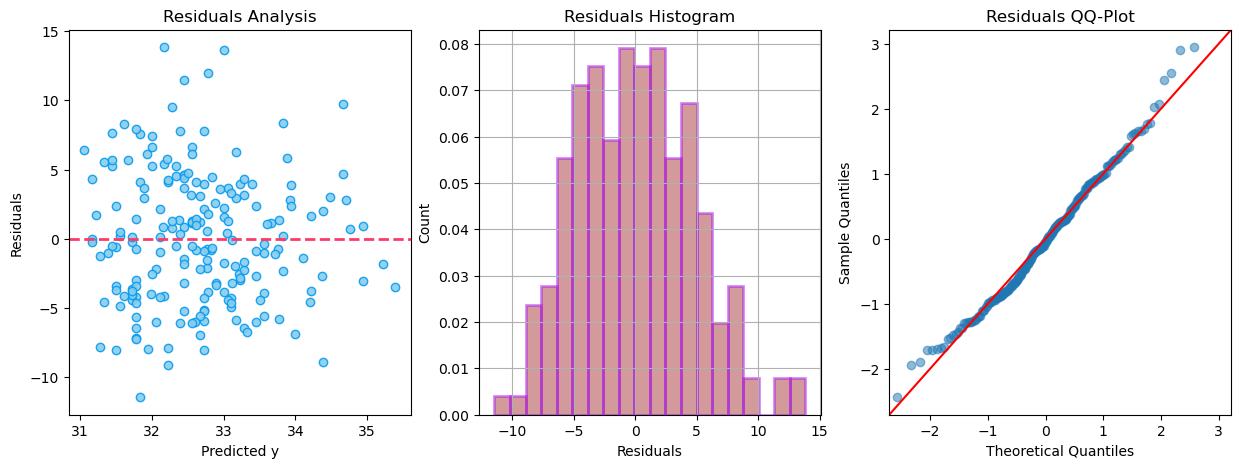

In [24]:
section8(whole_results, train_data, train_res)

In [25]:
def section9_aux(sign, x_new, y_new, s_square, ci_t_perc, C):
    return y_new + sign * (ci_t_perc * np.sqrt(s_square * (1 + x_new.T @ C @ x_new)))

In [26]:
def section9(train_data, test_data, train_res, test_res, results, explaining_vars, explained_var):
    print()
    print("====================================================================================================")
    print("Q1/9")
    print("====================================================================================================")
    new_df = pd.concat([test_data, test_res], axis=1).sample(1000)
    new_y_test = new_df[explained_var]
    new_df = new_df[explaining_vars]

    y_predicted = results.predict(sm.add_constant(new_df))
    s_square = np.dot(results.resid.to_numpy().T, results.resid.to_numpy()) / (len(results.resid.to_numpy()) - 4)
    ci_z_percentile = norm.ppf(1 - (0.05 / 2))
    C = np.linalg.inv(np.matmul(train_data.to_numpy().T, train_data.to_numpy()))
    CI = [(section9_aux(-1, x_new, y_new, s_square, ci_z_percentile, C),section9_aux(1, x_new, y_new, s_square, ci_z_percentile, C)) for (x_new, y_new) in zip(new_df.to_numpy(), y_predicted)]

    print(
        f"Calculated CI - [ will include the true value of the explained variable with 95% success rate ] :"
        f" {sum([c_l <= y_new[0] <= c_u for ((c_l, c_u), y_new) in zip(CI, new_y_test.to_numpy())]) / len(CI)}")
    print('This indicates that both train & test sets are distributed similarly.')
    print('Therefore, it is reasonable that the CI maintained it statistical significance on the new test data as well.')

In [27]:
section9(train_data, test_data, train_res, test_res, whole_results, explaining_vars_row, explained_var)


Q1/9
Calculated CI - [ will include the true value of the explained variable with 95% success rate ] : 0.944
This indicates that both train & test sets are distributed similarly.
Therefore, it is reasonable that the CI maintained it statistical significance on the new test data as well.


In [28]:
def mallow_cp(clf, y_true, num_features, array):
    y_predicted = clf.predict(array)
    sigma_squared = np.dot((y_true - np.mean(y_true)).T, (y_true - np.mean(y_true))) / (len(y_true) - 1)
    R_train_hat = len(y_true) * mean_squared_error(y_true, y_predicted)
    return R_train_hat + 2 * num_features * sigma_squared


In [29]:
def section10(train_data, test_data, train_res, test_res, results, explaining_vars, explained_var):
    print()
    print("====================================================================================================")
    print("Q1/10")
    print("====================================================================================================")
    poly = PolynomialFeatures(interaction_only=True, include_bias=True)
    interactions_array = poly.fit_transform(train_data)

    regular_array = np.concatenate([np.ones((200, 1)), train_data.to_numpy()], axis=1)
    y_array = [y[0] for y in train_data.to_numpy()]

    clf = LinearRegression()
    scores = cross_val_score(clf, regular_array, y_array, cv=5)
    print(f'Linear Model \nCV Mean: {scores.mean()}, CV STD: {scores.std()}')

    scores = cross_val_score(clf, interactions_array, y_array, cv=5)
    print(f'Interactions Model \nCV Mean: {scores.mean()}, CV STD: {scores.std()}')

    clf_linear = LinearRegression()
    clf_linear.fit(regular_array, y_array)
    linear_num_features = 3

    clf_interactions = LinearRegression()
    clf_interactions.fit(interactions_array, y_array)
    interaction_num_features = 6

    print(
        f'Linear Model \nMallow-CP : {mallow_cp(clf_linear, y_array, linear_num_features, regular_array)}\n'
        f'Interactions Model \nMallow-CP :'
        f' {mallow_cp(clf_interactions, y_array, interaction_num_features, interactions_array)}')
    print('This shows that the Regular Linear Regression model has recieved higher scores for the mean over 5-fold CV, and lower scores on Mallow Cp.')
    print('The findings might indicate that the Linear model describes the data better than the Interactions model.')
    print('However, both models preformed differences for 5-Folds mean and the Mallow-Cp, which are not significant. So the mentioned is not valid enoght to be conclude.')

In [30]:
section10(train_data, test_data, train_res, test_res, whole_results, explaining_vars_row, explained_var)


Q1/10
Linear Model 
CV Mean: 1.0, CV STD: 0.0
Interactions Model 
CV Mean: 1.0, CV STD: 0.0
Linear Model 
Mallow-CP : 1500.0468844221107
Interactions Model 
Mallow-CP : 3000.0937688442214
This shows that the Regular Linear Regression model has recieved higher scores for the mean over 5-fold CV, and lower scores on Mallow Cp.
The findings might indicate that the Linear model describes the data better than the Interactions model.
However, both models preformed differences for 5-Folds mean and the Mallow-Cp, which are not significant. So the mentioned is not valid enoght to be conclude.


# **Part 2**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
import statsmodels.api as stm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
import math
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## **Section 1**

כיצד משפיעים גיל, משקל וגובה על הזכייה במדליה?

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
def won_medal(row):
    if row['gold'] == 1:
        return 1
    if row['silver'] == 1:
        return 1
    if row['bronze'] == 1:
        return 1
    return 0

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
athlete_data = pd.read_csv("./athletes.csv")
countries = pd.read_csv("./countries.csv")
#renaming the "code" column in "countries" table in order to join the tables later
countries.rename(columns={'code':'nationality'}, inplace=True)
#joining the table on "nationality" column
athlete_data = pd.merge(athlete_data, countries,on='nationality')
#changing "weight" column to binary data
athlete_data['sex'] = athlete_data.sex.map(dict(female=1, male=0))
#creating a column indicating wether the athlete won any medal 
athlete_data['won_any_medal'] = athlete_data.apply(lambda row: won_medal(row), axis=1)
#converting the "dob" column to datetime 
"""
athlete_data['dob'] = pd.to_datetime(athlete_data.dob)
athlete_data['dob'] = athlete_data['dob'].mask(athlete_data['dob'].dt.year > 2016,
                                               athlete_data['dob'] - pd.DateOffset(years=100))
                                               """
#the length of the rows might change due to NAN values in "nationality" column,
#but we still have at least 4000 rows so we are fine to go!

# extract year
athlete_data['year'] = athlete_data['dob'].str.strip().str[-2:].astype(float)
athlete_data['year'] = athlete_data['year'].apply(lambda x: (x + 2000) if (x < 16) else (x + 1900))

# calculate age
athlete_data['age'] = 2016 - athlete_data['year']
athlete_data = athlete_data.drop(columns = ["dob", "year"])

athlete_data = athlete_data[athlete_data['weight'].notna()]
athlete_data = athlete_data[athlete_data['height'].notna()]
athlete_data = athlete_data[athlete_data['age'].notna()]
#df = df[df['population'].notna()]
#df = df[df['gdp_per_capita'].notna()]


## **Section 3** (Explenations ahead)

In [34]:
np.random.seed(5)

athletes_sample = athlete_data.sample(200)

athletes_sample

,id,name,nationality,sex,height,weight,sport,gold,silver,bronze,country,population,gdp_per_capita,won_any_medal,age
590,592844746,Crispin Duenas,CAN,0,1.70,81.0,archery,0,0,0,Canada,35851774.0,43248.529909,0,30.0
6315,754931470,Audrey Cordon,FRA,1,1.70,60.0,cycling,0,0,0,France,66808385.0,36205.568102,0,27.0
4719,797336359,Mamed Ibragimov,KAZ,0,1.71,97.0,wrestling,0,0,0,Kazakhstan,17544126.0,10509.981070,0,24.0
8504,819478867,Andreas Toba,GER,0,1.72,65.0,gymnastics,0,0,0,Germany,81413145.0,41313.313995,0,26.0
4963,737506601,Monika Ciaciuch,POL,1,1.82,74.0,rowing,0,0,1,Poland,37999494.0,12554.547554,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,464562333,Suad Natiq,IRQ,0,1.85,78.0,football,0,0,0,Iraq,36423395.0,4943.760388,0,22.0
1950,776128059,Nathan Adrian,USA,0,1.99,102.0,aquatics,2,0,2,United States,321418820.0,56115.718426,0,28.0
6890,676724984,Welson Sim,MAS,0,1.81,70.0,aquatics,0,0,0,Malaysia,30331007.0,9768.326860,0,19.0
7379,386696464,Sei Muroya,JPN,0,1.74,65.0,football,0,0,0,Japan,126958472.0,32477.215145,0,22.0


א.  נציג את הטבלה עבור המשתנה הבדיד:





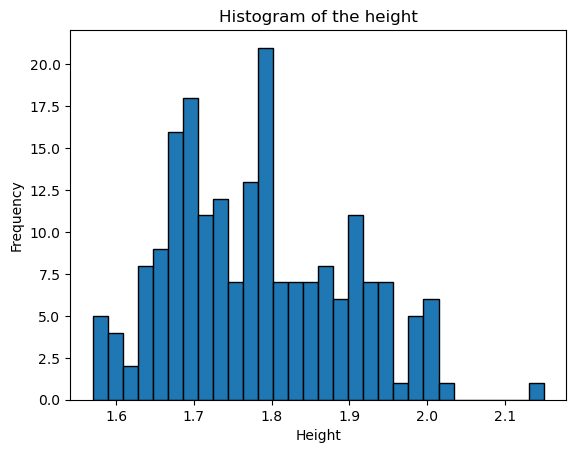

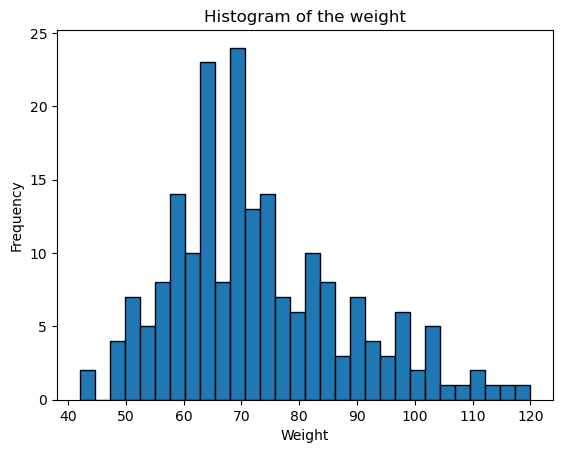

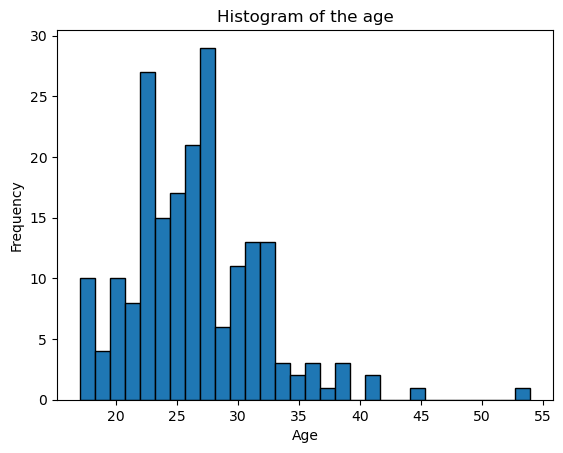

In [35]:
#plot histogram of the height but with outlines
plt.hist(athletes_sample['height'], bins=30, edgecolor='black')
plt.title('Histogram of the height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()
#plot histogram of the weight but with outlines
plt.hist(athletes_sample['weight'], bins=30, edgecolor='black')
plt.title('Histogram of the weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()
#plot histogram of the age but with outlines
plt.hist(athletes_sample['age'], bins=30, edgecolor='black')
plt.title('Histogram of the age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [36]:
got_medal =athletes_sample.groupby("won_any_medal", as_index = False).size().rename(columns = {"size" : "num of athletes"}).set_index(["won_any_medal"])
got_medal["won_any_medal"] = ["No", "Yes"]
got_medal_df = got_medal.set_index(["won_any_medal"])
print(got_medal_df)
print(" ")
print("null values in won_medal " + str(athletes_sample["won_any_medal"].isnull().sum()))
print("null values in gold medal " + str(athletes_sample["gold"].isnull().sum()))
print("null values in silver medal " + str(athletes_sample["silver"].isnull().sum()))
print("null values in bronze medal " + str(athletes_sample["bronze"].isnull().sum()))
print("null values in weight " + str(athletes_sample["weight"].isnull().sum()))
print("null values in age " + str(athletes_sample["age"].isnull().sum()))
print("null values in height " + str(athletes_sample["height"].isnull().sum()))

               num of athletes
won_any_medal                 
No                         166
Yes                         34
 
null values in won_medal 0
null values in gold medal 0
null values in silver medal 0
null values in bronze medal 0
null values in weight 0
null values in age 0
null values in height 0


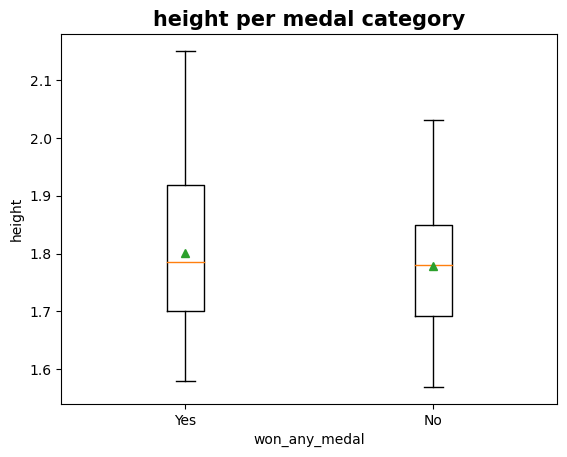

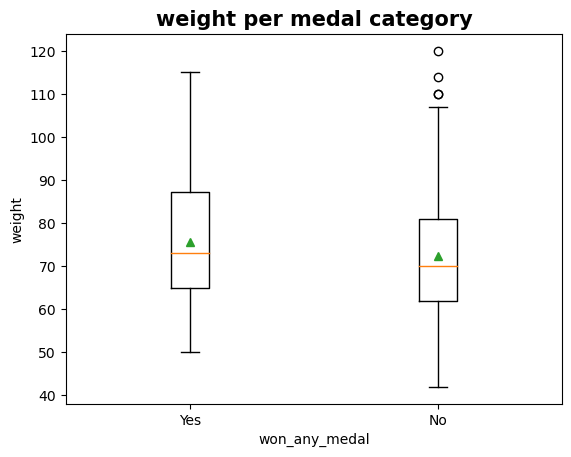

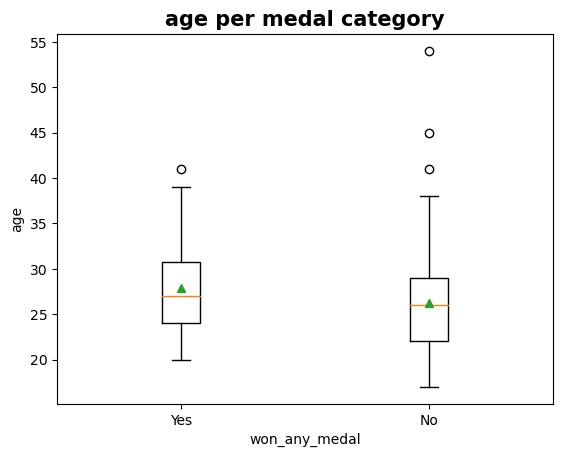

In [37]:
def box_plot_x_per_y(y_col, df):
  #print(df[df["won_any_medal"] == 1])
  #print([df[df["won_any_medal"] == 1][y_col], df[df["won_any_medal"] == 0][y_col]])
  plt.boxplot([df[df["won_any_medal"] == 1][y_col], df[df["won_any_medal"] == 0][y_col]], showmeans=True, labels = ["Yes", "No"])
  plt.title(f"{y_col} per medal category",size=15, fontweight="bold")
  plt.xlabel("won_any_medal")
  plt.ylabel(y_col)
  plt.plot()
  plt.show()

#print(athletes_sample['weight'], athletes_sample['won_any_medal'])
box_plot_x_per_y("height", athletes_sample)
box_plot_x_per_y("weight", athletes_sample)
box_plot_x_per_y("age", athletes_sample)


In [38]:
X = athletes_sample[['height','weight','age']].to_numpy()
y = athletes_sample['won_any_medal'].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]

model = LogisticRegression(penalty="none", fit_intercept=False).fit(X,y)
beta_est = model.coef_[0]
print(f"The coefficients are: {beta_est}")

The coefficients are: [-4.97964170e+00  1.00813053e+00  4.58883624e-03  4.63395846e-02]


In [39]:
def calc_pi(i):
    beta_T_X_i = np.matmul(beta_est.T, X[i])
    return np.exp(beta_T_X_i)/(1 + np.exp(beta_T_X_i))
X_all = athlete_data[['height','weight','age']].to_numpy()
y_all = athlete_data['won_any_medal'].to_numpy()
X_all = np.c_[np.ones(X_all.shape[0]), X_all]
model_all = LogisticRegression(penalty="none", fit_intercept=False).fit(X_all,y_all)
beta_est_all = model_all.coef_[0]
diagonal = [(1-calc_pi(i))*calc_pi(i) for i in range(X.shape[0])]
V_mat = np.diag(diagonal)
C_mat = np.linalg.inv(X.T@V_mat@X)
norm_q = stats.norm.ppf(0.975)
# as in the class question
for i, variable in zip(range(beta_est.shape[0]), ['beta_0', 'height', 'weight', 'age']):
  std_estimate = (C_mat[i][i])**(1/2) 
  CI_beta_i = [beta_est[i] - norm_q*std_estimate, beta_est[i] + norm_q*std_estimate]
  print(f"CI for beta number {i} is: {CI_beta_i}")
  print(f"Is the CI of {variable} in the sample contains the estimator of the original data: {beta_est_all[i] <= CI_beta_i[1] and beta_est_all[i] >= CI_beta_i[0]}")
  print("---------------------------------------------------------------")

CI for beta number 0 is: [-13.071204921942385, 3.1119215298183107]
Is the CI of beta_0 in the sample contains the estimator of the original data: True
---------------------------------------------------------------
CI for beta number 1 is: [-4.652461354062137, 6.668722409084808]
Is the CI of height in the sample contains the estimator of the original data: True
---------------------------------------------------------------
CI for beta number 2 is: [-0.037041936191955754, 0.046219608667938505]
Is the CI of weight in the sample contains the estimator of the original data: True
---------------------------------------------------------------
CI for beta number 3 is: [-0.018709839073656816, 0.11138900827383616]
Is the CI of age in the sample contains the estimator of the original data: True
---------------------------------------------------------------


In [40]:
x1 = athletes_sample['height'].to_numpy()
x2 = athletes_sample['weight'].to_numpy()
x3 = athletes_sample['age'].to_numpy()
y = athletes_sample['won_any_medal'].to_numpy()
# interactions
x1_2 = np.multiply(x1,x2)
x1_3 = np.multiply(x1,x3)
x2_3 = np.multiply(x2,x3)
X_inter = np.c_[X,x1_2] #concatenate previous model variables to the new interections
X_inter = np.c_[X_inter,x1_3]
X_inter = np.c_[X_inter,x2_3]
model_inter = LogisticRegression(penalty="none", fit_intercept=False).fit(X_inter,y)
beta_inter_est = model_inter.coef_[0]
print(f"New model coefficiants are: {beta_inter_est}")

New model coefficiants are: [ 0.05313252  0.06475321  0.10332425 -0.57827304 -0.08094101  0.28599149
  0.00158046]



ב. קל לראות כי התפלגות המשתנים אינה סימטרית, שכן יש הרבה פחות אתלטים שזכו במדליות מאשר אלו שלא זכו. התופעה גיונית שכן מתוך כל מקצה זוכים רק שלושה אתלטים בכל פעם. כמו כן לא היו ערכים חסרים בעמודות כיוון שניקינו ערכים אלו טרם הדגימה (בדאטה המלא).
​


ג. לפי הגרפים המוצגים לעיל, נראה כי יש קשר בין משקל לזכייה במדליה, שכן ניתן להסיק כי טווח הערכים שונה באופן די משמעותי בין אלו שזכו במדליה לאלו שלא זכו. לעומת זאת בקטגוריה של הגיל נראה כי אין הבדל משמעותי בין הערכים ולכן ניתן להסיק שהקשר בין גיל לזכייה במדליה זניח; בקטגוריה של הגובה - נראה כי קיים הבדל קל בין ערכי הזוכים לאלו שלא זכו, וניתן להסיק קשר חלש בין גובה לזכייה במדליה.

## **Section 4 explenation**

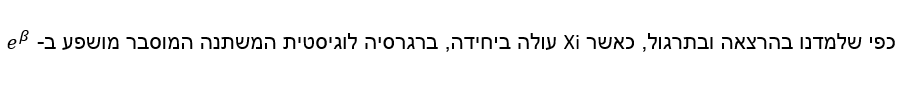

## **Section 5 explenation**

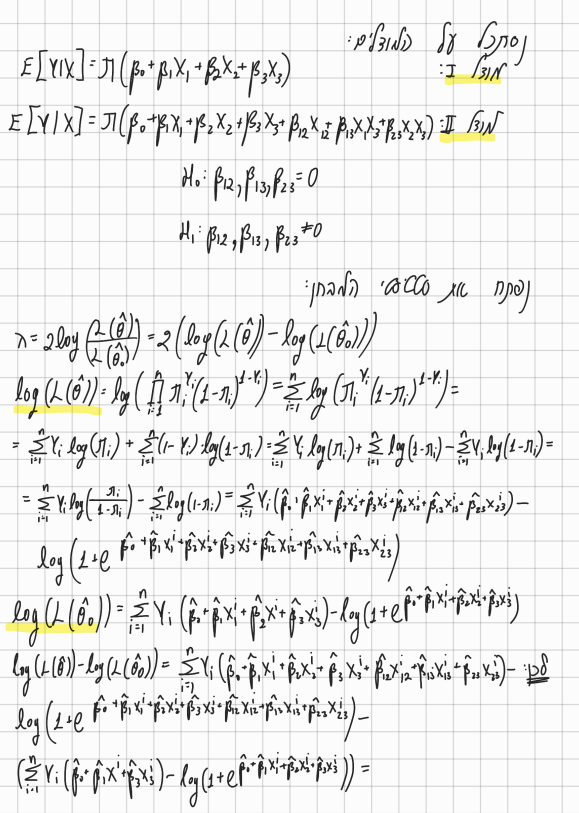

## **Section 6 explenation**


ממבחן יחס הנראות, נעדיף את המודל עם האינטרקציות שכן דחינו את השערת האפס שאומרת כי המקדמים של גורמי האינטרקציה שווים לאפס.

In [41]:
#aic
def calc_lnb(X, beta_est, y):
    sum = 0
    for i in range(X.shape[0]):
        beta_T_X_i = beta_est@X[i]
        sum += (beta_T_X_i)*y[i] - np.log(1+np.exp(beta_T_X_i))
    return sum

log_like_regression = calc_lnb(X, beta_est, y)
log_like_new_model = calc_lnb(X_inter, beta_inter_est, y)
AIC_old_model = log_like_regression - (beta_est.shape[0]-1)
AIC_new_model = log_like_new_model - (beta_inter_est.shape[0]-1)
print(f"AIC of regular old regression: {AIC_old_model}")
print(f"AIC of model with interactions:  {AIC_new_model}")


AIC of regular old regression: -92.58590304980662
AIC of model with interactions:  -93.7797827323966


מטרתנו למקסם את ערך המשתנה הנ"ל, ואנו רואים כי הערך שמתייחס למודל החדש עם האינטרקציות יותר גבוה מהערך עבור המודל הישן ולכן נעדיף את המודל החדש עם האינטרקציות מסדר ראשון.

In [42]:
def AIC_score(X,y,beta_est):
    score = 0
    for i in range(X.shape[0]):
        score += y[i] * beta_est@X[i] - np.log(1 + np.exp(beta_est@X[i]))
    return round(score - (beta_est.shape[0]-1),3)
def BIC_score (X,y,beta_est):
    score = 0
    for i in range(X.shape[0]):
        score += y[i] * beta_est@X[i] - np.log(1 + math.exp(beta_est@X[i]))
    return round(score - (beta_est.shape[0]-1)*math.log(y.shape[0])/2,3)

In [43]:
variables = ['height', 'weight', 'age']
all_pairs = [[a, b] for idx, a in enumerate(variables) for b in variables[idx + 1:]]
new_df_2 = athletes_sample[variables].copy()

# creating df of interactions
for inter in all_pairs:
  x_1 = athletes_sample[inter[0]].to_numpy()
  x_2 = athletes_sample[inter[1]].to_numpy()
  x_1_2 = np.multiply(x_1,x_2)
  new_df_2[f"{inter[0]}_inter_{inter[1]}"] = x_1_2

y = athletes_sample['won_any_medal'].to_numpy()
new_df_2

,height,weight,age,height_inter_weight,height_inter_age,weight_inter_age
590,1.70,81.0,30.0,137.70,51.00,2430.0
6315,1.70,60.0,27.0,102.00,45.90,1620.0
4719,1.71,97.0,24.0,165.87,41.04,2328.0
8504,1.72,65.0,26.0,111.80,44.72,1690.0
4963,1.82,74.0,24.0,134.68,43.68,1776.0
...,...,...,...,...,...,...
6939,1.85,78.0,22.0,144.30,40.70,1716.0
1950,1.99,102.0,28.0,202.98,55.72,2856.0
6890,1.81,70.0,19.0,126.70,34.39,1330.0
7379,1.74,65.0,22.0,113.10,38.28,1430.0


In [44]:
def select_var_forward(X,y, selected_var, left_variables, scoring_func):
    global selected_variables
    next_var = None
    next_score = -100000000
    for var in left_variables: 
        X_curr = X[selected_var + [var]].to_numpy()
        model = LogisticRegression(penalty='none', fit_intercept=False)
        model.fit(X_curr, y)
        beta_estimators = model.coef_[0]
        curr_score = scoring_func(X_curr, y, beta_estimators)
        if curr_score > next_score:
            next_var = var
            next_score = curr_score
    if next_var != None:
      left_variables.remove(next_var)
    return next_score, selected_var + [next_var], left_variables

def forward(X, y, scoring_func):
    variables = set(X.columns)
    left_variables = variables.copy()
    score, selected_var = -math.inf, []
    next_score, selected_var, left_variables = select_var_forward(X, y, selected_var, left_variables, scoring_func)
    while score < next_score:
        score = next_score
        next_score, selected_var, left_variables = select_var_forward(X, y, selected_var, left_variables, scoring_func)
    return selected_var, score

def select_var_backward(X,y, selected_var, scoring_func):
    new_variables = None
    next_score = -100000000
    global selected_variables
    for var in selected_var: 
        new_variables = selected_var.copy()
        new_variables.remove(var)
        if(len(new_variables) == 0):
            continue
        X_curr = X[new_variables].to_numpy()
        model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000)
        model.fit(X_curr, y)
        beta_est = model.coef_[0]
        curr_score = scoring_func(X_curr, y, beta_est)
        if curr_score > next_score:
            selected_variables = new_variables
            next_score = curr_score

    return next_score, selected_variables

def backward(X, y, scoring_func):
    variables = set(X.columns)
    model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000)
    model.fit(X,y)
    beta_est = model.coef_[0]
    selected_var = variables.copy()
    score = scoring_func(X.to_numpy(), y, beta_est)
    next_score, selected_var = select_var_backward(X, y, selected_var, scoring_func)

    while score < next_score:
        score = next_score
        next_score, selected_var = select_var_backward(X, y, selected_var, scoring_func)

    return selected_var, score

## **Section 7 explenation**

In [45]:
selected_variables = {}
selected_variables, score = forward(new_df_2, y, AIC_score)
print("Selected variables using forware: " + str(list(selected_variables)) +  " AIC score:" + str(score))

selected_variables, score = backward(new_df_2, y, AIC_score)
print("Selected variables using backward: " + str(list(selected_variables)) +  " AIC score:" + str(score))



Selected variables using forware: ['height', 'weight_inter_age', 'age'] AIC score:-90.529
Selected variables using backward: ['age', 'weight_inter_age'] AIC score:-90.88


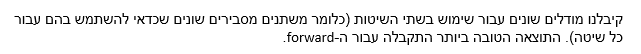

## **Section 8 explenation**

In [46]:
selected_variables, score = forward(new_df_2, y, BIC_score)
print("Selected variables using forward_stepwise: " + str(list(selected_variables)) +  " BIC score:" + str(score))

selected_variables, score = backward(new_df_2, y, BIC_score)
print("Selected variables using backward: " + str(list(selected_variables)) +  " BIC score:" + str(score))

Selected variables using forward_stepwise: ['height', 'weight_inter_age'] BIC score:-91.872
Selected variables using backward: ['age', 'weight_inter_age'] BIC score:-94.178


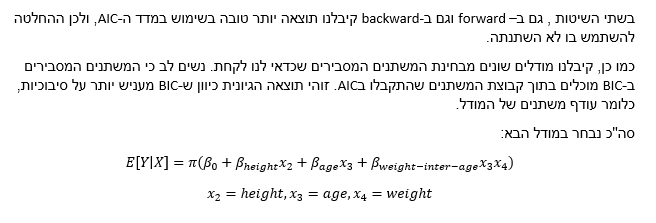